<a href="https://colab.research.google.com/github/anncipher/Data_Science_Nigeria_Projects/blob/main/DSN_Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Creating a dataset for linear regression task


In [ ]:
# Creating a list with 5 rows, 2 columns

data = [[-1,-1], [1,2], [2,3], [4,3], [6,5], [7,8]]
data


[[-1, -1], [1, 2], [2, 3], [4, 3], [6, 5], [7, 8]]

In [ ]:
# Since input data to our model must be an N Dimensional Array, the list above must be represented as an Array

# Create the pandas DataFrame with the list and add column headers

dataset = pd.DataFrame(data, columns = ['X', 'y'])
print(dataset)
print('Datatype of X and Y:', type(dataset))

   X  y
0 -1 -1
1  1  2
2  2  3
3  4  3
4  6  5
5  7  8
Datatype of X and Y: <class 'pandas.core.frame.DataFrame'>


In [ ]:
# Split the dataset into input (feature X) and output (target y) from pandas DataFrame named dataset

X = dataset.iloc[:, :-1].values # All rows, all columns excluding the last column indexed -1
y = dataset.iloc[:, 1].values # All rows, column 1

print('\n Input Feature X = ', X, '\n The shape of X = ', X.shape, '\n Output (Y) = ', y, '\n Shape of y = ', y.shape)
print('Datatype of X and Y: ', type(X), type(y))


 Input Feature X =  [[-1]
 [ 1]
 [ 2]
 [ 4]
 [ 6]
 [ 7]] 
 The shape of X =  (6, 1) 
 Output (Y) =  [-1  2  3  3  5  8] 
 Shape of y =  (6,)
Datatype of X and Y:  <class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Given that X (an independent variable) is a predictor of y (dependent variable)

# 1. What linear regression equation best estimates y based on X?
# MODEL TRAINING

In [ ]:
# Fitting Simple Linear Regression to the Dataset

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [ ]:
regressor.score(X,y)

0.8981055055474146

In [ ]:
# Intercept b0

print(regressor.intercept_)

0.38078291814946663


In [ ]:
# Coefficient or slope of regression

regressor.coef_

array([0.93238434])

In [ ]:
# To check correlation between variables

cor = dataset.corr()
print(cor)

          X         y
X  1.000000  0.947684
y  0.947684  1.000000


# 2. What new values of y will the linear regression equation suggest in line with the previous data X?
# MODEL TESTING

In [ ]:
# Predicting the Dataset results an input feature alone

y_pred = regressor.predict(X)

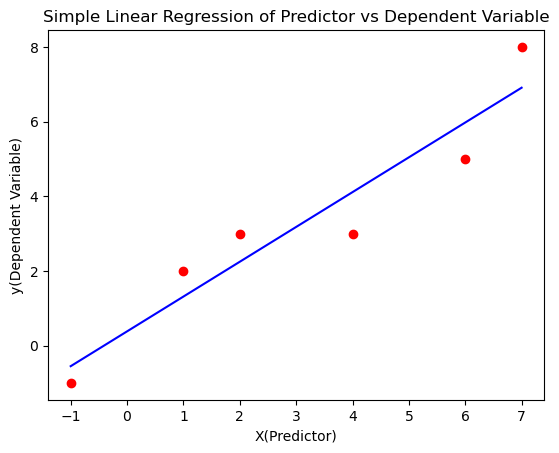

In [ ]:
# Visualizing the results

plt.scatter(X, y, color = 'red') # Scatterplot of the X on y dataset

plt.plot(X, regressor.predict(X), color = 'blue') # line plot of X against predicted Y

plt.title('Simple Linear Regression of Predictor vs Dependent Variable')
plt.xlabel('X(Predictor)')
plt.ylabel('y(Dependent Variable)')
plt.show()

In [ ]:
# Adding the result column to the existing dataset table

dataset ['yhat'] = y_pred
dataset

,X,y,yhat
0,-1,-1,-0.551601
1,1,2,1.313167
2,2,3,2.245552
3,4,3,4.110320
4,6,5,5.975089
5,7,8,6.907473


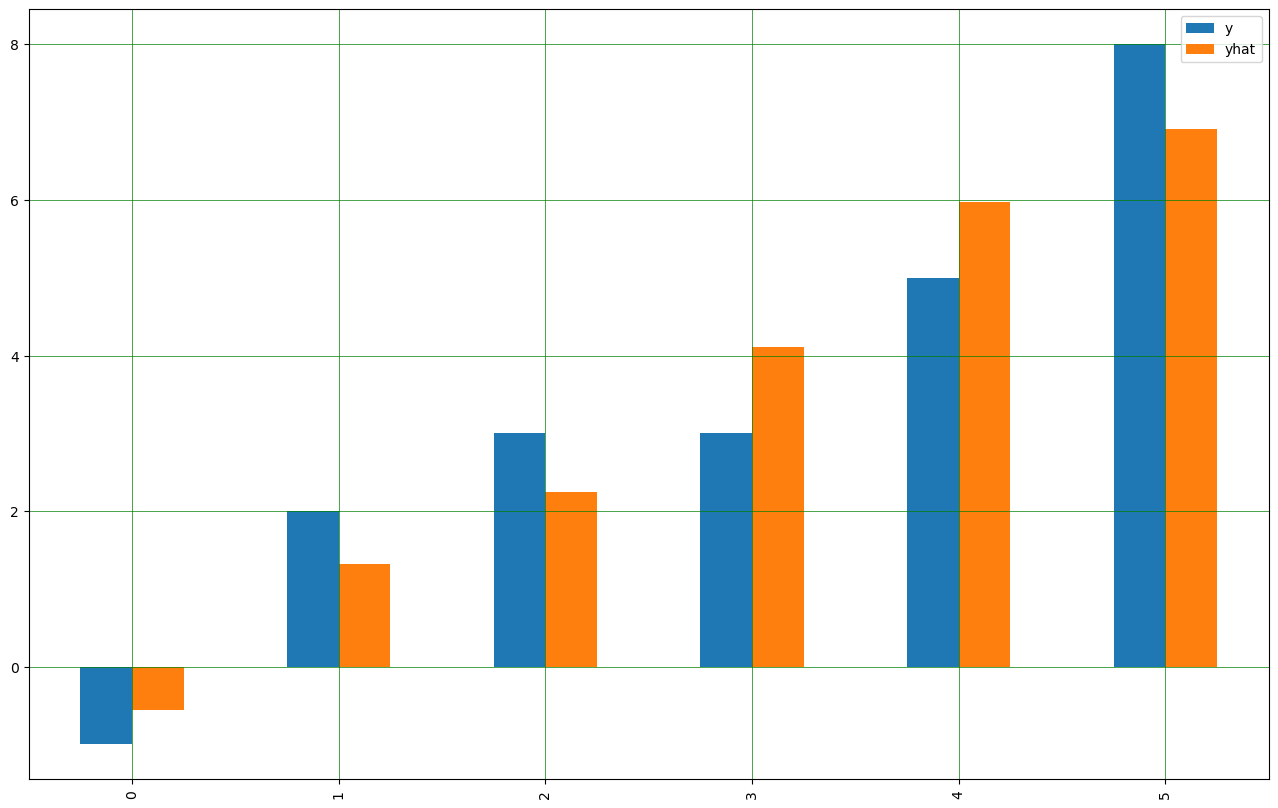

In [ ]:
# A bar plot showing the difference between actual value (y) and predicted value (yhat)

dataset[['y','yhat']].plot(kind = 'bar', figsize = (16,10))

plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

# 3. How well does the regression equation fit the data?



In [ ]:
# Slicing out the actual output (y) and predicted output (yhat)

result = dataset[['y', 'yhat']]

In [ ]:
# Creating a column in the result to store mean errors from all observations

n = len(dataset)

# Error from each prediction

result['error'] = dataset['y'].subtract(dataset['yhat'])

print(result)

# Calculating Root Mean Square error: rsme

mse = np.mean((dataset['yhat'] - dataset['y']) ** 2)

# Summation of all error function from all predictions

cost_function = abs(result['error']).sum()
Mean_Absolute_Error = cost_function / n
Root_Mean_Squared_Error = np.sqrt(mse)

print()
print(cost_function)
print(Mean_Absolute_Error)
print(Root_Mean_Squared_Error)

   y      yhat     error
0 -1 -0.551601 -0.448399
1  2  1.313167  0.686833
2  3  2.245552  0.754448
3  3  4.110320 -1.110320
4  5  5.975089 -0.975089
5  8  6.907473  1.092527

5.06761565836299
0.8446026097271649
0.8774220840859636


# Using Sklearn Regression Metrics

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.8446026097271649
Mean Squared Error: 0.7698695136417557
Root Mean Squared Error: 0.8774220840859636


# CONCLUSION

The disparity between the actual y and predicted yhat shows that the algorithm is not very accurate.

## Factors
- Relatively small data
- Bad assumptions: Visualization may help
- Poor feature: The feature (X) may not have had a high enough correlation to the value (y) we were trying to predict.

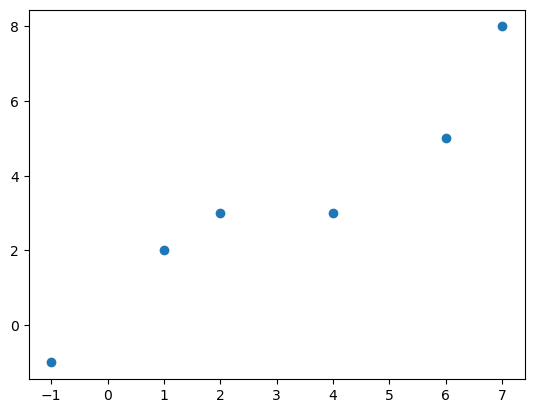

In [ ]:
# visualizing the data on scatter plot

plt.scatter(X,y)
plt.show()

In this case, Polynomial regression can be used. This is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x.

In [ ]:
# importing Polynomial Feature class from Sklearn

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4) # Degree depicts the curves
X_poly = poly_reg.fit_transform(X)

# poly_reg.fit(X_poly,y) # Transform X as polynomial feature

In [ ]:
regressor_2 = LinearRegression()
regressor_2.fit(X_poly,y)

LinearRegression()

In [ ]:
regressor_2.score(X_poly,y)

0.99828352180937

In [ ]:
# Predicting a new result with Polynomial Regression

Poly_pred = regressor_2.predict(poly_reg.fit_transform(X))
print('regression coefficient = ', regressor_2.coef_)
print('regression intercept = ', regressor_2.intercept_)

regression coefficient =  [ 0.          1.58605277 -0.30016155 -0.01510501  0.00665051]
regression intercept =  0.850726978998368


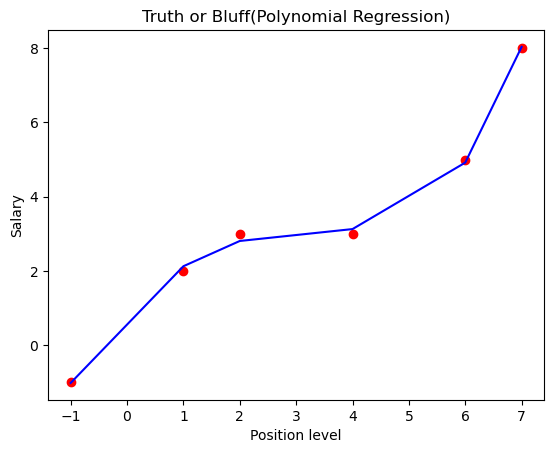

In [ ]:
# Visualizing the Polynomial Regression results

plt.scatter(X, y, color = 'red')
plt.plot(X, regressor_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff(Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
dataset['yhat_poly'] = Poly_pred
dataset

,X,y,yhat,yhat_poly
0,-1,-1,-0.551601,-1.013732
1,1,2,1.313167,2.128164
2,2,3,2.245552,2.807754
3,4,3,4.110320,3.128164
4,6,5,5.975089,4.917609
5,7,8,6.907473,8.032041


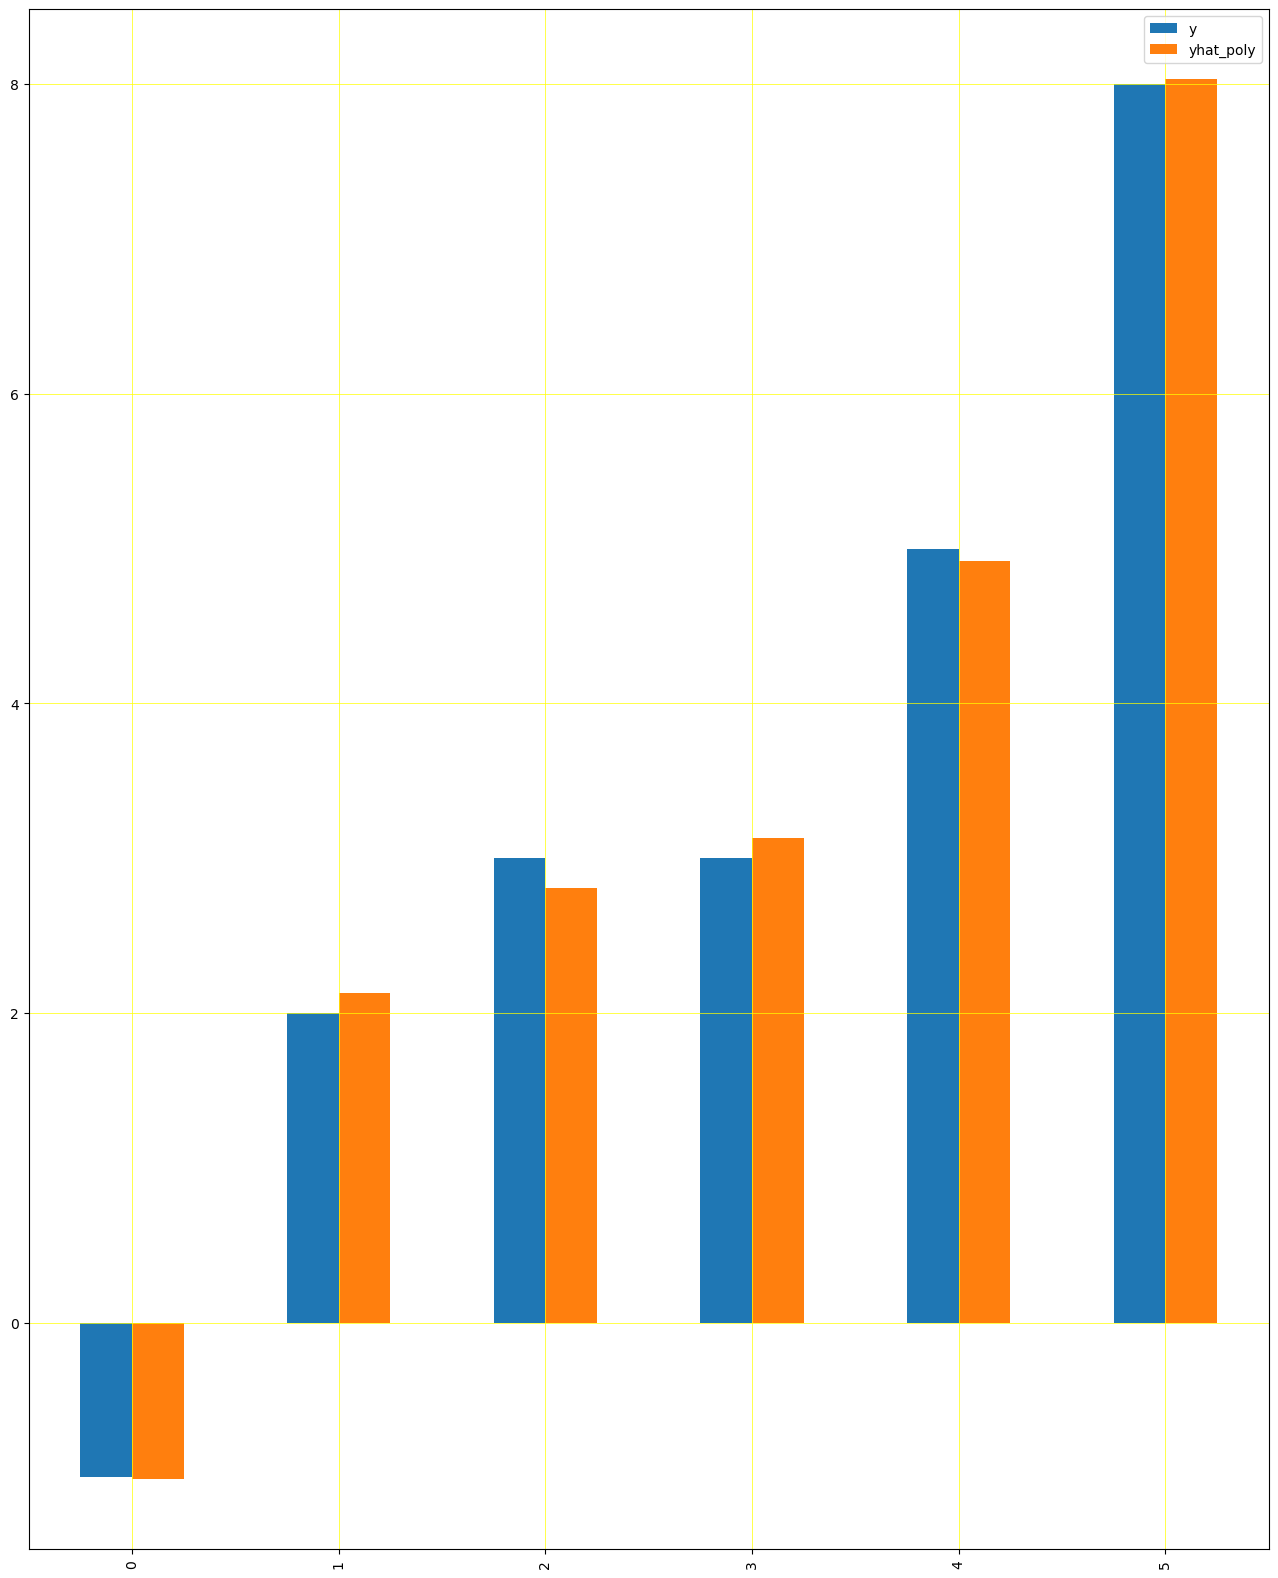

In [ ]:
# A bar plot showing the difference between actual value (y) and predicted value using polynomial regression (yhat_poly)

dataset[['y', 'yhat_poly']].plot(kind = 'bar', figsize = (16,20))

plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'yellow')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'green')
plt.show()